# NYC-Taxi-Data-ETL-Pipeline

#### This project showcases an efficient Extract, Transform, Load (ETL) pipeline, meticulously crafted using Python and SQLite. Dive into real-world data processing, where raw NYC taxi trip records are transformed into a structured format for insightful analysis. Each step from data cleaning, transformation, to loading into a SQLite database is detailed in Jupyter NotebooksPerfect for data enthusiasts seeking practical ETL experience with real-world datasets!

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os


In [2]:
df1 = pd.read_parquet("yellow_tripdata_2023-09.parquet")
df2 = pd.read_parquet("yellow_tripdata_2023-10.parquet")

In [3]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.50,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.20,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.60,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.10,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.00,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846717,2,2023-09-30 23:31:12,2023-09-30 23:48:29,NaN,2.43,NaN,None,125,107,0,17.69,0.0,0.5,4.34,0.0,1.0,26.03,NaN,NaN
2846718,1,2023-09-30 23:42:18,2023-09-30 23:47:45,NaN,0.00,NaN,None,236,75,0,11.33,0.0,0.5,0.00,0.0,1.0,15.33,NaN,NaN
2846719,1,2023-09-30 23:03:35,2023-09-30 23:14:50,NaN,1.80,NaN,None,211,90,0,12.10,1.0,0.5,2.57,0.0,1.0,19.67,NaN,NaN
2846720,2,2023-09-30 23:57:05,2023-10-01 00:17:36,NaN,3.39,NaN,None,209,97,0,20.33,0.0,0.5,4.87,0.0,1.0,29.20,NaN,NaN


In [4]:
df1.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140225
trip_distance                 0
RatecodeID               140225
store_and_fwd_flag       140225
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140225
Airport_fee              140225
dtype: int64

In [5]:
df1.dropna(axis=0, inplace=True)

In [6]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.00,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.00,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.00,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.00,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.00,1.0,73.77,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706492,1,2023-09-30 23:30:43,2023-09-30 23:39:15,2.0,1.50,1.0,N,163,236,2,8.6,3.5,0.5,0.00,0.00,1.0,13.60,2.5,0.00
2706493,1,2023-09-30 23:57:35,2023-10-01 00:31:52,1.0,8.90,1.0,N,230,17,1,35.2,3.5,0.5,8.05,0.00,1.0,48.25,2.5,0.00
2706494,2,2023-09-30 23:08:07,2023-09-30 23:16:03,1.0,2.30,1.0,N,262,233,1,12.1,1.0,0.5,1.37,0.00,1.0,18.47,2.5,0.00
2706495,2,2023-09-30 23:27:31,2023-09-30 23:46:24,1.0,3.44,1.0,N,161,261,1,19.8,1.0,0.5,6.20,0.00,1.0,31.00,2.5,0.00


In [7]:
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-10-01 00:16:44,2023-10-01 00:16:49,1.0,0.00,1.0,N,168,168,2,3.00,1.0,0.5,0.00,0.0,1.0,5.50,0.0,0.0
1,1,2023-10-01 00:23:24,2023-10-01 00:23:47,1.0,0.00,1.0,N,168,168,2,3.00,1.0,0.5,0.00,0.0,1.0,5.50,0.0,0.0
2,1,2023-10-01 00:21:18,2023-10-01 00:27:31,1.0,0.90,1.0,N,161,186,1,6.50,3.5,0.5,2.90,0.0,1.0,14.40,2.5,0.0
3,1,2023-10-01 00:17:39,2023-10-01 00:17:47,0.0,0.00,1.0,N,255,255,3,3.00,1.0,0.5,0.00,0.0,1.0,5.50,0.0,0.0
4,2,2023-10-01 00:16:15,2023-10-01 00:22:57,2.0,1.41,1.0,N,151,239,1,10.00,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522280,1,2023-10-31 23:44:53,2023-11-01 00:08:00,NaN,0.00,NaN,None,230,243,0,35.79,0.0,0.5,0.00,0.0,1.0,39.79,NaN,NaN
3522281,2,2023-10-31 23:38:00,2023-10-31 23:51:00,NaN,3.10,NaN,None,233,236,0,14.51,0.0,0.5,3.70,0.0,1.0,22.21,NaN,NaN
3522282,2,2023-10-31 23:56:58,2023-11-01 00:15:03,NaN,2.71,NaN,None,68,211,0,15.60,0.0,0.5,3.33,0.0,1.0,22.93,NaN,NaN
3522283,1,2023-10-31 23:37:55,2023-10-31 23:50:16,NaN,0.00,NaN,None,114,144,0,11.50,0.0,0.5,0.00,0.0,1.0,15.50,NaN,NaN


In [8]:
df2.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          154929
trip_distance                 0
RatecodeID               154929
store_and_fwd_flag       154929
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     154929
Airport_fee              154929
dtype: int64

In [9]:
df2.dropna(axis=0, inplace=True)

In [10]:
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-10-01 00:16:44,2023-10-01 00:16:49,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.0,1.0,5.50,0.0,0.0
1,1,2023-10-01 00:23:24,2023-10-01 00:23:47,1.0,0.00,1.0,N,168,168,2,3.0,1.0,0.5,0.00,0.0,1.0,5.50,0.0,0.0
2,1,2023-10-01 00:21:18,2023-10-01 00:27:31,1.0,0.90,1.0,N,161,186,1,6.5,3.5,0.5,2.90,0.0,1.0,14.40,2.5,0.0
3,1,2023-10-01 00:17:39,2023-10-01 00:17:47,0.0,0.00,1.0,N,255,255,3,3.0,1.0,0.5,0.00,0.0,1.0,5.50,0.0,0.0
4,2,2023-10-01 00:16:15,2023-10-01 00:22:57,2.0,1.41,1.0,N,151,239,1,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367351,1,2023-10-31 23:30:25,2023-10-31 23:57:54,2.0,6.90,1.0,N,142,160,1,32.4,3.5,0.5,9.30,0.0,1.0,46.70,2.5,0.0
3367352,1,2023-10-31 23:02:09,2023-10-31 23:09:23,1.0,2.30,1.0,N,48,143,1,10.7,3.5,0.5,3.15,0.0,1.0,18.85,2.5,0.0
3367353,1,2023-10-31 23:14:41,2023-10-31 23:22:46,2.0,2.70,1.0,N,142,236,2,12.1,3.5,0.5,0.00,0.0,1.0,17.10,2.5,0.0
3367354,1,2023-10-31 23:31:33,2023-11-01 00:20:19,3.0,15.70,1.0,N,142,61,1,54.1,3.5,0.5,14.80,0.0,1.0,73.90,2.5,0.0


In [11]:
df = pd.concat([df1, df2])

In [12]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367351,1,2023-10-31 23:30:25,2023-10-31 23:57:54,2.0,6.90,1.0,N,142,160,1,32.4,3.5,0.5,9.30,0.0,1.0,46.70,2.5,0.00
3367352,1,2023-10-31 23:02:09,2023-10-31 23:09:23,1.0,2.30,1.0,N,48,143,1,10.7,3.5,0.5,3.15,0.0,1.0,18.85,2.5,0.00
3367353,1,2023-10-31 23:14:41,2023-10-31 23:22:46,2.0,2.70,1.0,N,142,236,2,12.1,3.5,0.5,0.00,0.0,1.0,17.10,2.5,0.00
3367354,1,2023-10-31 23:31:33,2023-11-01 00:20:19,3.0,15.70,1.0,N,142,61,1,54.1,3.5,0.5,14.80,0.0,1.0,73.90,2.5,0.00


In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

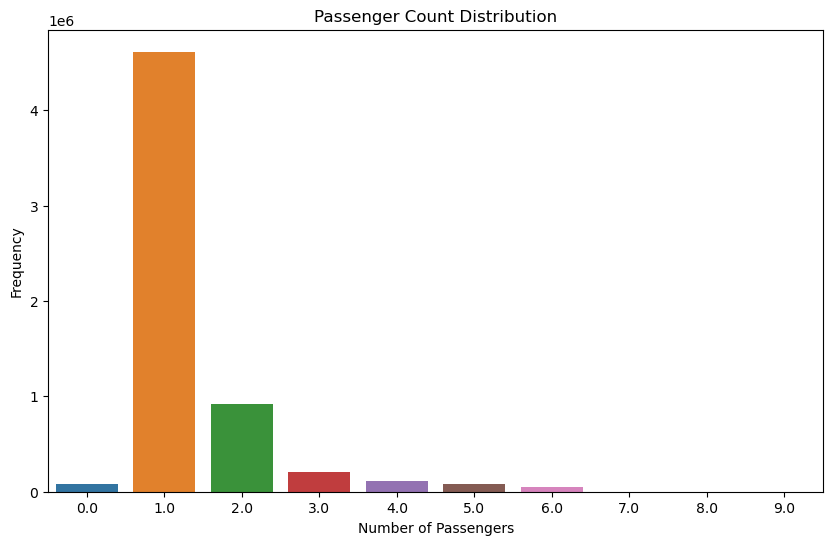

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["passenger_count"].value_counts().index, 
            y=df["passenger_count"].value_counts().values)

plt.title("Passenger Count Distribution")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()

In [16]:
df["Airport_fee"].value_counts()

Airport_fee
 0.00    5502732
 1.75     561551
-1.75       9570
Name: count, dtype: int64

In [17]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073848,1,2023-10-31 23:30:25,2023-10-31 23:57:54,2.0,6.90,1.0,N,142,160,1,32.4,3.5,0.5,9.30,0.0,1.0,46.70,2.5,0.00
6073849,1,2023-10-31 23:02:09,2023-10-31 23:09:23,1.0,2.30,1.0,N,48,143,1,10.7,3.5,0.5,3.15,0.0,1.0,18.85,2.5,0.00
6073850,1,2023-10-31 23:14:41,2023-10-31 23:22:46,2.0,2.70,1.0,N,142,236,2,12.1,3.5,0.5,0.00,0.0,1.0,17.10,2.5,0.00
6073851,1,2023-10-31 23:31:33,2023-11-01 00:20:19,3.0,15.70,1.0,N,142,61,1,54.1,3.5,0.5,14.80,0.0,1.0,73.90,2.5,0.00


## creating Fact and Dimension Tables


In [18]:
df['Trip_ID'] = df.index

In [19]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Trip_ID
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00,0
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00,1
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00,2
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00,3
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073848,1,2023-10-31 23:30:25,2023-10-31 23:57:54,2.0,6.90,1.0,N,142,160,1,32.4,3.5,0.5,9.30,0.0,1.0,46.70,2.5,0.00,6073848
6073849,1,2023-10-31 23:02:09,2023-10-31 23:09:23,1.0,2.30,1.0,N,48,143,1,10.7,3.5,0.5,3.15,0.0,1.0,18.85,2.5,0.00,6073849
6073850,1,2023-10-31 23:14:41,2023-10-31 23:22:46,2.0,2.70,1.0,N,142,236,2,12.1,3.5,0.5,0.00,0.0,1.0,17.10,2.5,0.00,6073850
6073851,1,2023-10-31 23:31:33,2023-11-01 00:20:19,3.0,15.70,1.0,N,142,61,1,54.1,3.5,0.5,14.80,0.0,1.0,73.90,2.5,0.00,6073851


In [20]:
df.shape

(6073853, 20)

In [21]:
index = ["Trip_ID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count",
        "trip_distance","RatecodeID", "store_and_fwd_flag", "PULocationID", "DOLocationID", "payment_type", 
        "fare_amount","extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", 
        "total_amount", "congestion_surcharge", "Airport_fee"]

In [22]:
df = df[index]

In [23]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [24]:
df

,Trip_ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00
1,1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,14.2,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00
2,2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,8.6,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00
3,3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1,5.1,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00
4,4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1,45.0,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073848,6073848,1,2023-10-31 23:30:25,2023-10-31 23:57:54,2.0,6.90,1.0,N,142,160,1,32.4,3.5,0.5,9.30,0.0,1.0,46.70,2.5,0.00
6073849,6073849,1,2023-10-31 23:02:09,2023-10-31 23:09:23,1.0,2.30,1.0,N,48,143,1,10.7,3.5,0.5,3.15,0.0,1.0,18.85,2.5,0.00
6073850,6073850,1,2023-10-31 23:14:41,2023-10-31 23:22:46,2.0,2.70,1.0,N,142,236,2,12.1,3.5,0.5,0.00,0.0,1.0,17.10,2.5,0.00
6073851,6073851,1,2023-10-31 23:31:33,2023-11-01 00:20:19,3.0,15.70,1.0,N,142,61,1,54.1,3.5,0.5,14.80,0.0,1.0,73.90,2.5,0.00


In [25]:
#Creating a dimension table 

datetime_dim = df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].reset_index(drop=True)
datetime_dim["tpep_pickup_datetime"] = datetime_dim["tpep_pickup_datetime"]
datetime_dim["pick_hour"] = datetime_dim["tpep_pickup_datetime"].dt.hour
datetime_dim["pick_day"] = datetime_dim["tpep_pickup_datetime"].dt.day
datetime_dim["pick_month"] = datetime_dim["tpep_pickup_datetime"].dt.month
datetime_dim["pick_year"] = datetime_dim["tpep_pickup_datetime"].dt.year
datetime_dim["pick_weekday"] = datetime_dim["tpep_pickup_datetime"].dt.weekday

datetime_dim["tpep_dropoff_datetime"] = datetime_dim["tpep_dropoff_datetime"]
datetime_dim["drop_hour"] = datetime_dim["tpep_dropoff_datetime"].dt.hour
datetime_dim["drop_day"] = datetime_dim["tpep_dropoff_datetime"].dt.day
datetime_dim["drop_month"] = datetime_dim["tpep_dropoff_datetime"].dt.month
datetime_dim["drop_year"] = datetime_dim["tpep_dropoff_datetime"].dt.year
datetime_dim["drop_weekday"] = datetime_dim["tpep_dropoff_datetime"].dt.weekday

datetime_dim["datetime_id"] = datetime_dim.index



In [26]:
datetime_dim

,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday,datetime_id
0,2023-09-01 00:15:37,2023-09-01 00:20:21,0,1,9,2023,4,0,1,9,2023,4,0
1,2023-09-01 00:18:40,2023-09-01 00:30:28,0,1,9,2023,4,0,1,9,2023,4,1
2,2023-09-01 00:35:01,2023-09-01 00:39:04,0,1,9,2023,4,0,1,9,2023,4,2
3,2023-09-01 00:45:45,2023-09-01 00:47:37,0,1,9,2023,4,0,1,9,2023,4,3
4,2023-09-01 00:01:23,2023-09-01 00:38:05,0,1,9,2023,4,0,1,9,2023,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073848,2023-10-31 23:30:25,2023-10-31 23:57:54,23,31,10,2023,1,23,31,10,2023,1,6073848
6073849,2023-10-31 23:02:09,2023-10-31 23:09:23,23,31,10,2023,1,23,31,10,2023,1,6073849
6073850,2023-10-31 23:14:41,2023-10-31 23:22:46,23,31,10,2023,1,23,31,10,2023,1,6073850
6073851,2023-10-31 23:31:33,2023-11-01 00:20:19,23,31,10,2023,1,0,1,11,2023,2,6073851


In [27]:
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day',
                             'pick_month', 'pick_year', 'pick_weekday','tpep_dropoff_datetime', 
                             'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2023-09-01 00:15:37,0,1,9,2023,4,2023-09-01 00:20:21,0,1,9,2023,4
1,1,2023-09-01 00:18:40,0,1,9,2023,4,2023-09-01 00:30:28,0,1,9,2023,4
2,2,2023-09-01 00:35:01,0,1,9,2023,4,2023-09-01 00:39:04,0,1,9,2023,4
3,3,2023-09-01 00:45:45,0,1,9,2023,4,2023-09-01 00:47:37,0,1,9,2023,4
4,4,2023-09-01 00:01:23,0,1,9,2023,4,2023-09-01 00:38:05,0,1,9,2023,4


In [28]:
datetime_dim["pick_weekday"].value_counts()

pick_weekday
1    956919
2    907659
3    892598
4    873122
5    866444
0    819286
6    757825
Name: count, dtype: int64

In [29]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}

payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim["payment_type_name"] = payment_type_dim["payment_type"].map(payment_type_name)
payment_type_dim['payment_type_id'] = payment_type_dim.index

payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]
payment_type_dim

,payment_type_id,payment_type,payment_type_name
0,0,2,Cash
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card
...,...,...,...
6073848,6073848,1,Credit card
6073849,6073849,1,Credit card
6073850,6073850,2,Cash
6073851,6073851,1,Credit card


In [30]:
store_and_fwd_flag_des=  {
    "Y":"store and forward trip",
    "N":"not a store and forward trip"
}

store_and_fwd_flag_dim = df[['store_and_fwd_flag']].reset_index(drop=True)

store_and_fwd_flag_dim["store_and_fwd_flag_des"] = store_and_fwd_flag_dim["store_and_fwd_flag"].map(store_and_fwd_flag_des)
store_and_fwd_flag_dim["store_and_fwd_flag_id"] = store_and_fwd_flag_dim.index

store_and_fwd_flag_dim = store_and_fwd_flag_dim[['store_and_fwd_flag_id','store_and_fwd_flag',
                                                 'store_and_fwd_flag_des']]

In [31]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].reset_index(drop=True)
rate_code_dim["rate_code_id"] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)

rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

In [32]:
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]


In [33]:
trip_distance_dim = df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]


In [34]:

fact_table = df.merge(passenger_count_dim, left_on='Trip_ID', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='Trip_ID', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='Trip_ID', right_on='rate_code_id') \
             .merge(store_and_fwd_flag_dim, left_on='Trip_ID', right_on='store_and_fwd_flag_id') \
             .merge(datetime_dim, left_on='Trip_ID', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='Trip_ID', right_on='payment_type_id') \
             [['Trip_ID','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag_id', 'PULocationID', 'DOLocationID',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount', "congestion_surcharge", "Airport_fee"]]

In [35]:
fact_table

,Trip_ID,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag_id,PULocationID,DOLocationID,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,0,1,0,0,0,0,0,163,230,0,6.5,3.5,0.5,0.00,0.0,1.0,11.50,2.5,0.00
1,1,2,1,1,1,1,1,236,233,1,14.2,1.0,0.5,2.00,0.0,1.0,21.20,2.5,0.00
2,2,2,2,2,2,2,2,162,236,2,8.6,1.0,0.5,2.00,0.0,1.0,15.60,2.5,0.00
3,3,2,3,3,3,3,3,141,229,3,5.1,1.0,0.5,1.00,0.0,1.0,11.10,2.5,0.00
4,4,2,4,4,4,4,4,138,230,4,45.0,6.0,0.5,17.02,0.0,1.0,73.77,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073848,6073848,1,6073848,6073848,6073848,6073848,6073848,142,160,6073848,32.4,3.5,0.5,9.30,0.0,1.0,46.70,2.5,0.00
6073849,6073849,1,6073849,6073849,6073849,6073849,6073849,48,143,6073849,10.7,3.5,0.5,3.15,0.0,1.0,18.85,2.5,0.00
6073850,6073850,1,6073850,6073850,6073850,6073850,6073850,142,236,6073850,12.1,3.5,0.5,0.00,0.0,1.0,17.10,2.5,0.00
6073851,6073851,1,6073851,6073851,6073851,6073851,6073851,142,61,6073851,54.1,3.5,0.5,14.80,0.0,1.0,73.90,2.5,0.00


In [36]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('nyc_taxi.db')

# Create SQLAlchemy engine for SQLite
engine = create_engine('sqlite:///nyc_taxi.db')

# Load each DataFrame into its respective table in SQLite
fact_table.to_sql('fact_table', engine, if_exists='append', index=False)
passenger_count_dim.to_sql('passenger_count_dim', engine, if_exists='append', index=False)
trip_distance_dim.to_sql('trip_distance_dim', engine, if_exists='append', index=False)
rate_code_dim.to_sql('rate_code_dim', engine, if_exists='append', index=False)
store_and_fwd_flag_dim.to_sql('store_and_fwd_flag_dim', engine, if_exists='append', index=False)
datetime_dim.to_sql('datetime_dim', engine, if_exists='append', index=False)
payment_type_dim.to_sql('payment_type_dim', engine, if_exists='append', index=False)

# Close the connection
conn.close()


In [44]:
conn = sqlite3.connect('nyc_taxi.db')


query = """
SELECT * FROM datetime_dim ;

"""
datetime_df = pd.read_sql_query(query, conn)


# Close the SQLite connection
conn.close()


In [45]:
datetime_df 

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2023-09-01 00:15:37.000000,0,1,9,2023,4,2023-09-01 00:20:21.000000,0,1,9,2023,4
1,1,2023-09-01 00:18:40.000000,0,1,9,2023,4,2023-09-01 00:30:28.000000,0,1,9,2023,4
2,2,2023-09-01 00:35:01.000000,0,1,9,2023,4,2023-09-01 00:39:04.000000,0,1,9,2023,4
3,3,2023-09-01 00:45:45.000000,0,1,9,2023,4,2023-09-01 00:47:37.000000,0,1,9,2023,4
4,4,2023-09-01 00:01:23.000000,0,1,9,2023,4,2023-09-01 00:38:05.000000,0,1,9,2023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073848,6073848,2023-10-31 23:30:25.000000,23,31,10,2023,1,2023-10-31 23:57:54.000000,23,31,10,2023,1
6073849,6073849,2023-10-31 23:02:09.000000,23,31,10,2023,1,2023-10-31 23:09:23.000000,23,31,10,2023,1
6073850,6073850,2023-10-31 23:14:41.000000,23,31,10,2023,1,2023-10-31 23:22:46.000000,23,31,10,2023,1
6073851,6073851,2023-10-31 23:31:33.000000,23,31,10,2023,1,2023-11-01 00:20:19.000000,0,1,11,2023,2
